# PHYS 20323/60323 Homework Week 8 (part 2)

FALL 2022


### 4) Altitude of a satellite (continued)

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [20]:
import math

grav=(6.6743*10**(-11))
mearth=(5.97219*10**24)
rearth=(6.371*10**6)

#time m is in minutes, output is in 10^3 kilometers
def orbit_height(m):
    t=(m*60)
    height=round((((((grav*mearth*(t**2))/(4*((math.pi)**2)))**(1/3))-rearth)/1000000),3)
    if (height<0):
        return('it is impossible to orbit at that speed')
    else: 
        return(height)

print(orbit_height(45))
print(orbit_height(90))

it is impossible to orbit at that speed
0.282


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive hieghts with times less than geosynchronous in blue and those longer in green.

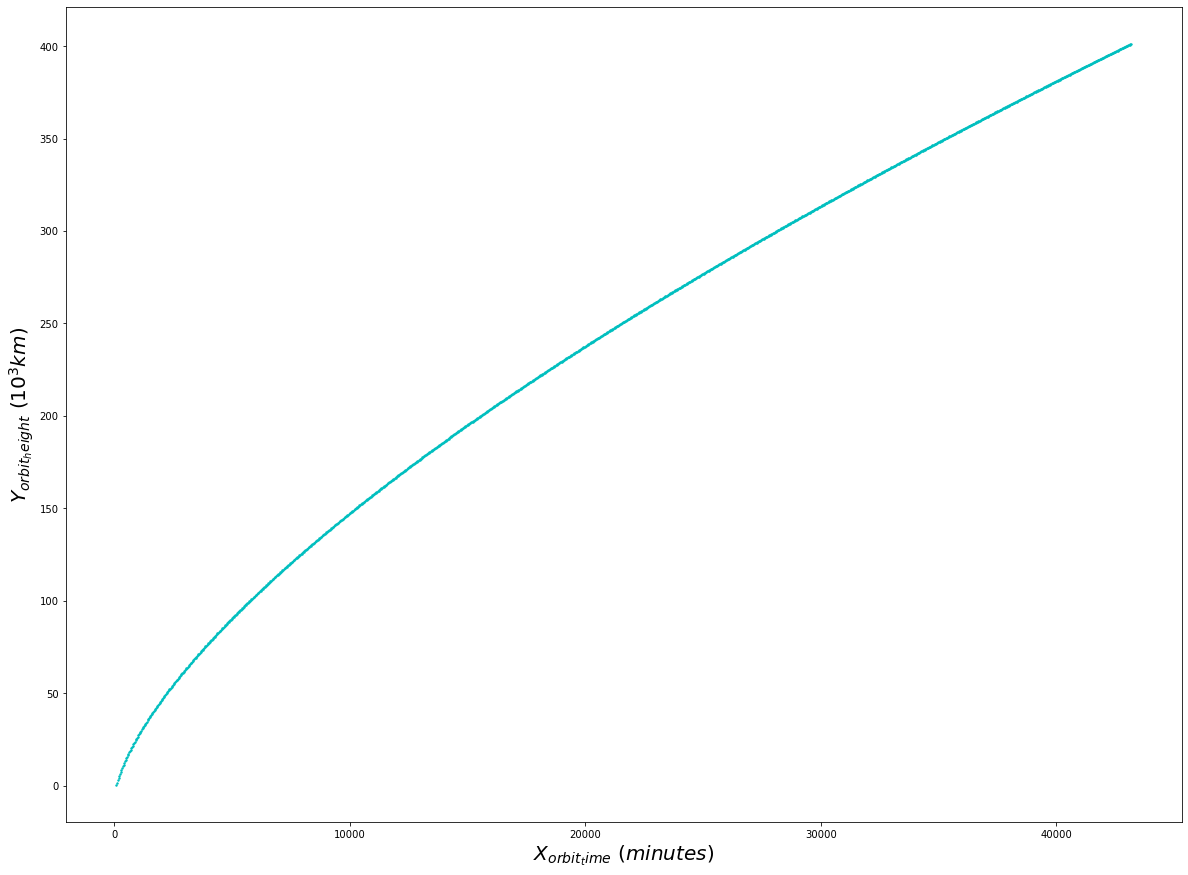

In [23]:
from matplotlib import pyplot as plt
import numpy as np

thirty_days=int((24*60*30))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_xlabel("$X_{orbit_time}$ $(minutes)$",size=20)
ax.set_ylabel("$Y_{orbit_height}$ $(10^3km)$",size=20) 

for z in range(90,thirty_days,30):
    orb_time = z
    orb_height = orbit_height(z)
    ax.scatter(orb_time,orb_height,s=2,c='c',alpha=1)



### 2) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 

Solve for $v_2$ using, where $M = 1.9891 \times 10^{30}$ kg is the mass of the Sun, and G = $6.6738 \times 10^{−11}$ m$^3$ kg$^{−1}$ s$^{−2}$ :

$$ v_2^2 - \frac{2 G M}{ v_1 l_1}  v_2 - \left( v_1^2 - \frac{2 G M}{ l_1} \right) = 0 $$


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.



In [56]:
M=np.float64(1.9891*10**30)
G=np.float64(6.6738*10**(-11))

def orbit(v_one,l_one):

    y=np.float64(-(2*G*M)/(v_one*l_one))
    z=np.float64(-((v_one**2)-((2*G*M)/l_one)))

    plus=np.float64(((-y)+((y**2)-4*z)**(.5))/2)
    minus=np.float64(((-y)-((y**2)-4*x*z)**(.5))/2)

    if round(plus,1)==round(v_one,1):
        v_two=minus
    elif round(minus,1)==round(v_one,1):
        v_two=plus
    else:
        v_two=minus
    
    print(v_two)
    l_two=((l_one*v_one)/v_two)

    a=.5*(l_one+l_two)
    b=((l_one*l_two)**(.5))
    T=(2*np.pi*a*b)/(l_one*v_one)
    e=(l_two-l_one)/(l_two+l_one)

    v_two_print=round((v_two/1000),4)
    l_two_print=round((l_two/1000000),4)
    a_print=round((a/1000000),2)
    b_print=round((b/1000000),2)
    T_print=round((T/31469940),4)

    print('v2= '+str(v_two_print)+' km/s')
    print('l2='+str(l_two_print)+' 10^3km')
    print('semi major axis= '+str(a_print)+' 10^3km')
    print('semi minor axis= '+str(b_print)+' 10^3km')
    print('orbital period= '+str(T_print)+' years')
    print('orbital ecentricity '+str(e))

#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [54]:
l_one_earth=np.float64(1.471*10**11)
v_one_earth=np.float64(30287)
orbit(v_one_earth,l_one_earth)

v2= 29.3054 km/s
l2=152027.1972 10^3km
semi major axis= 149563.6 10^3km
semi minor axis= 149543.31 10^3km
orbital period= 1.0023 years
orbital ecentricity 0.016471913134744297


In [55]:
l_one_halley=np.float64(8.873*(10**10))
v_one_halley=np.float64(5.4529*10**4)
orbit(v_one_halley,l_one_halley)

v2= 0.3444 km/s
l2=14049094.1258 10^3km
semi major axis= 7068912.06 10^3km
semi minor axis= 1116501.73 10^3km
orbital period= 325.6851 years
orbital ecentricity 0.9874478563022528


In [ ]:
for x in range (1,5):
    print(x)